In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load local version of gallifrey, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.setup import data_setup
from gallifrey.particles import rotated_dataset

from yt_maps import plot_component_maps


      NumExpr defaulting to 8 threads.



## DATA SETUP

In [4]:
snapshot = 127
resolution = 8192
sim_id = "37_11"

figure_subdirectory = (
    f"MilkyWayAnalogue/{mw.resolution}/{mw.sim_id}/{mw.snapshot}/Galaxy_component_maps"
)
save = True

In [5]:
ds, mw, stellar_model, imf, planet_model, path = data_setup(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-09-22 15:08:20,141 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-09-22 15:08:20,290 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-09-22 15:08:20,291 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-09-22 15:08:20,291 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-09-22 15:08:20,292 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-09-22 15:08:20,293 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-09-22 15:08:20,293 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-09-22 15:08:20,293 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-09-22 15:08:20,294 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-09-22 15:08:20,294 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## CREATE DATA SOURCE

In [6]:
radius = 0.2 * mw.virial_radius()
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [7]:
sphere_data = mw.sphere(radius=radius)
rotated_data = {
    component: rotated_dataset(
        sphere_data,
        mw.centre(),
        normal_vector,
        [
            (f"{component}_stars", "total_number"),
        ],
        bounding_box=[
            [-ds.domain_width[0].to("kpc") / 2, ds.domain_width[0].to("kpc") / 2]
        ]
        * 3,
    )
    for component in ["bulge", "thin_disk", "thick_disk", "halo", "galaxy"]
}

yt : [INFO     ] 2023-09-22 15:08:25,268 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-22 15:08:25,269 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-09-22 15:08:25,270 Parameters: domain_left_edge          = [-80. -80. -80.]
yt : [INFO     ] 2023-09-22 15:08:25,270 Parameters: domain_right_edge         = [80. 80. 80.]
yt : [INFO     ] 2023-09-22 15:08:25,271 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-22 15:08:25,273 Allocating for 6.693e+04 particles
yt : [INFO     ] 2023-09-22 15:08:26,754 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-22 15:08:26,754 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-09-22 15:08:26,755 Parameters: domain_left_edge          = [-80. -80. -80.]
yt : [INFO     ] 2023-09-22 15:08:26,756 Parameters: domain_right_edge         = [80. 80. 80.]
yt : [INFO     ] 2023-09-22 15:08:26,756 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09

## PLOT MAPS

yt : [INFO     ] 2023-09-22 15:08:29,812 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:29,813 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:29,815 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:29,815 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:29,818 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-22 15:08:31,412 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:31,412 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:31,414 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:31,414 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:31,415 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-22 15:08:32,702 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:32,702 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:32,704 xlim = -21.

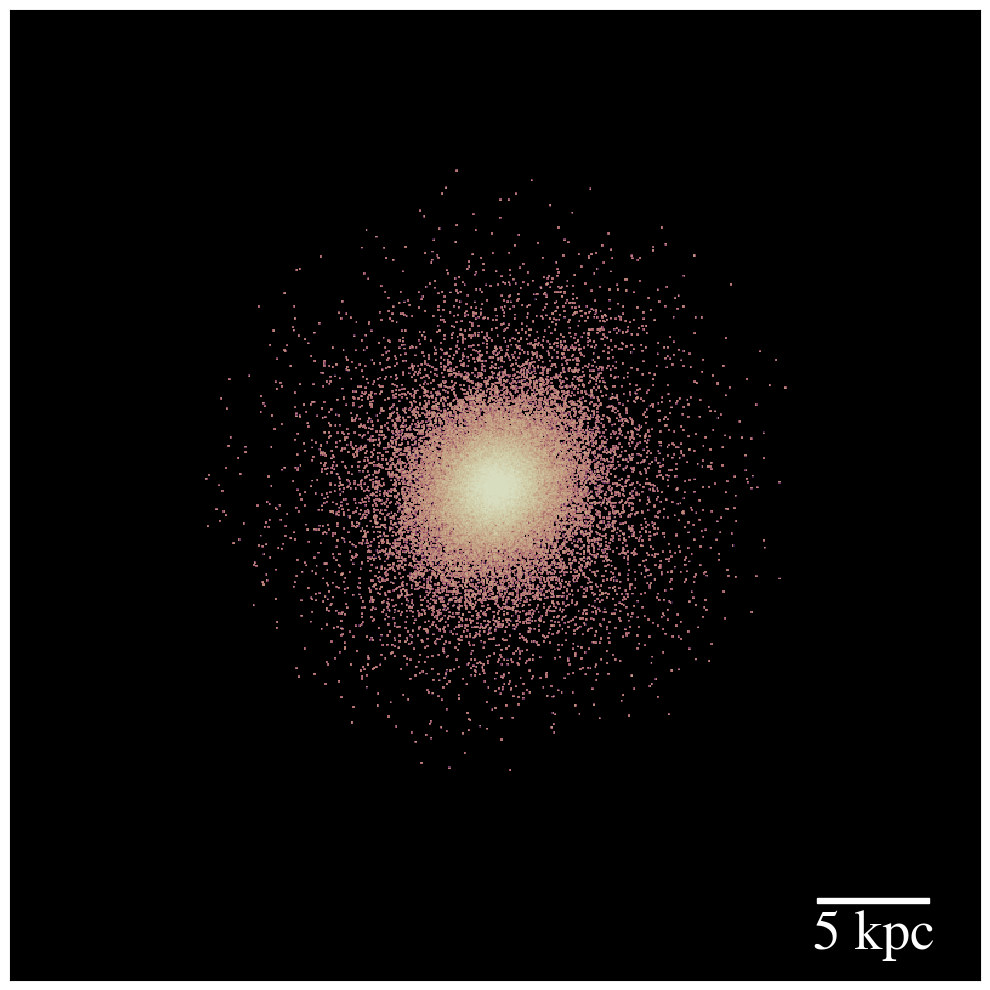

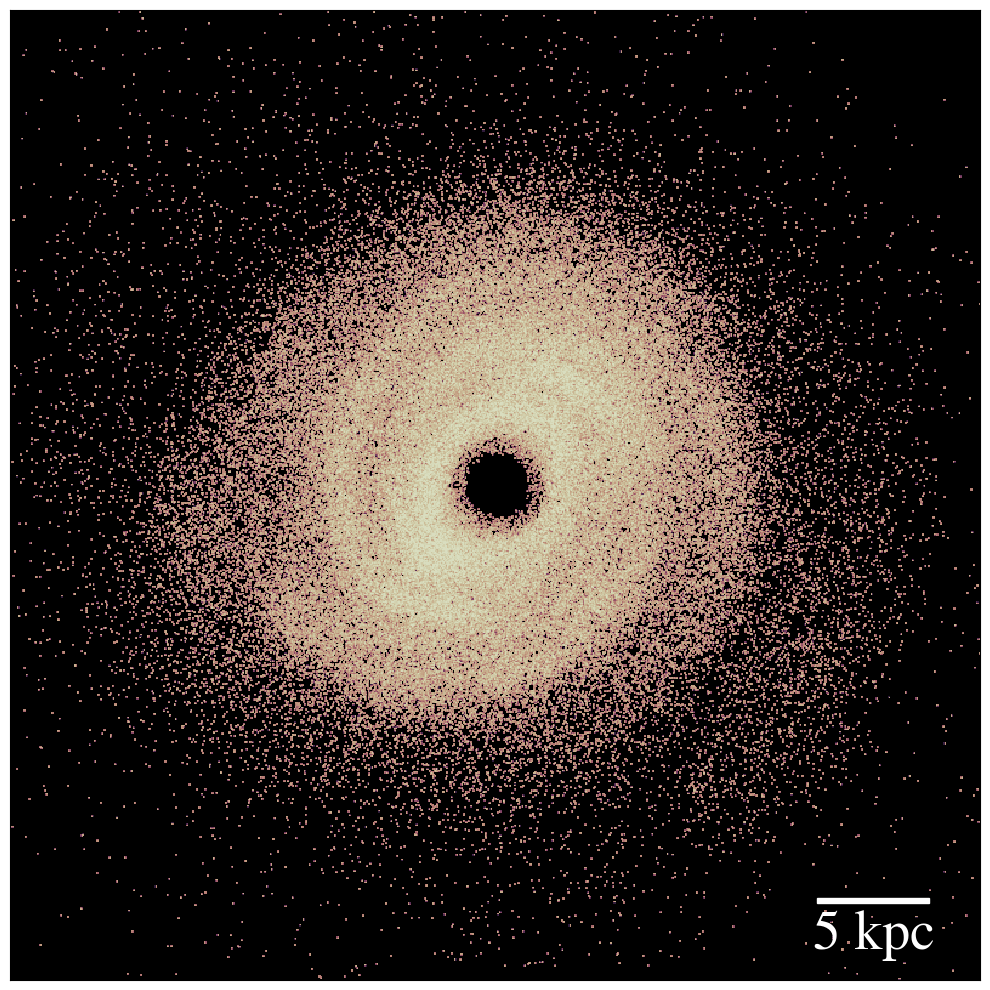

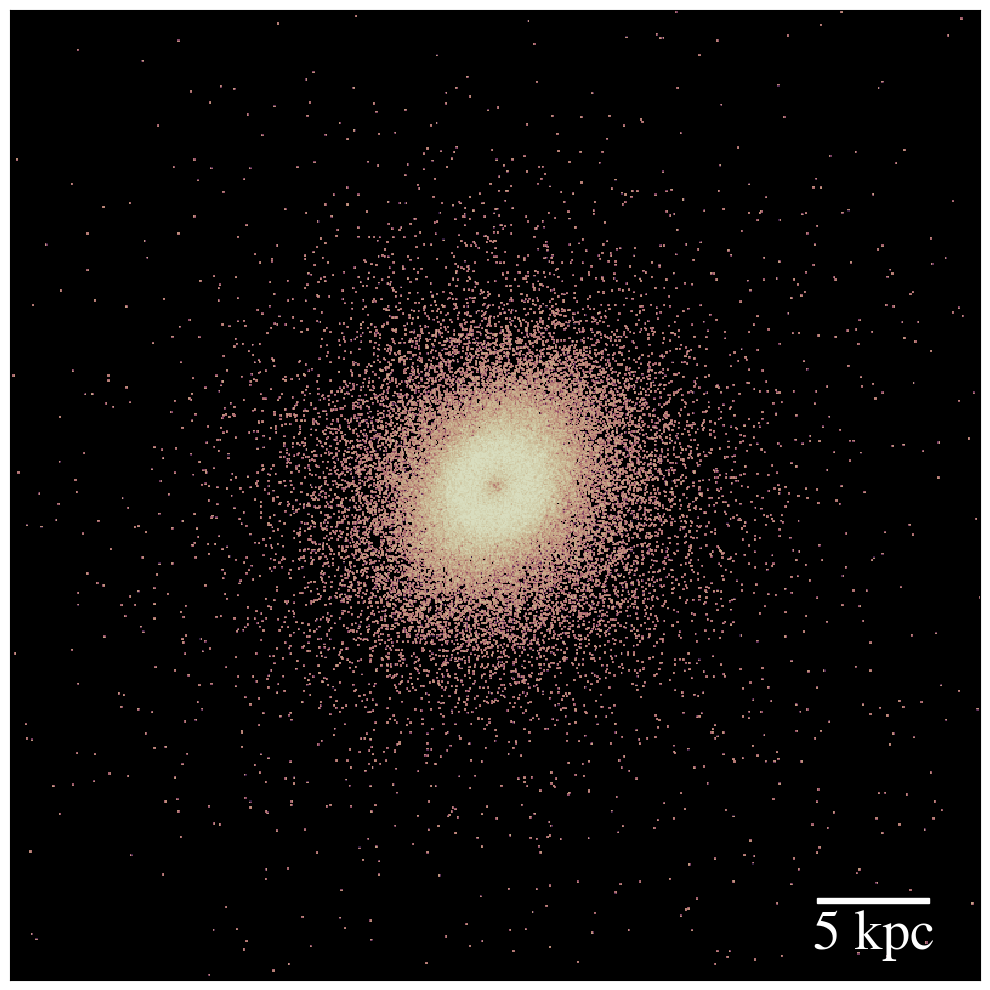

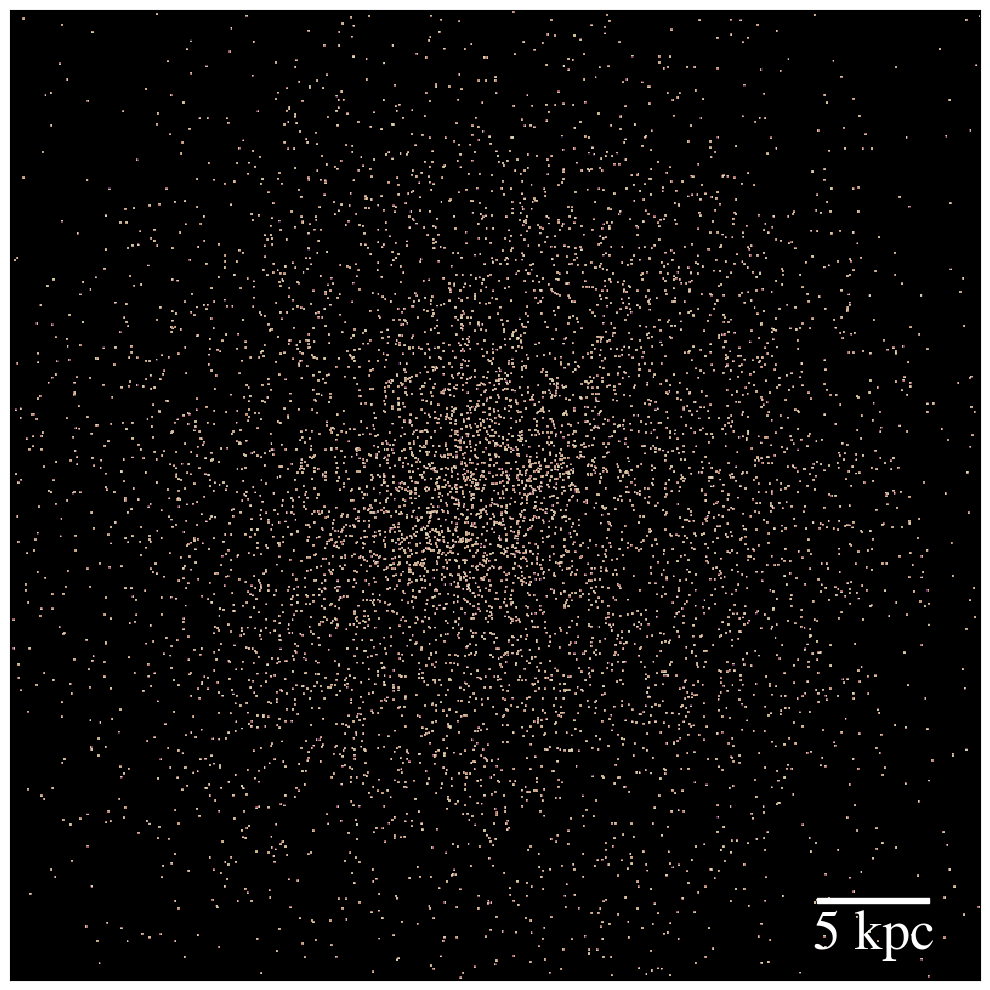

In [8]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    normal="z",
    save=save,
    hide_colorbar=True,
    hide_axes=True,
    figure_subdirectory=figure_subdirectory,
)

yt : [INFO     ] 2023-09-22 15:08:35,983 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:35,983 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:35,985 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:35,985 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:35,986 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-22 15:08:37,276 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:37,277 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:37,279 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:37,279 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:37,280 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-22 15:08:38,522 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:38,522 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-09-22 15:08:38,524 xlim = -21.

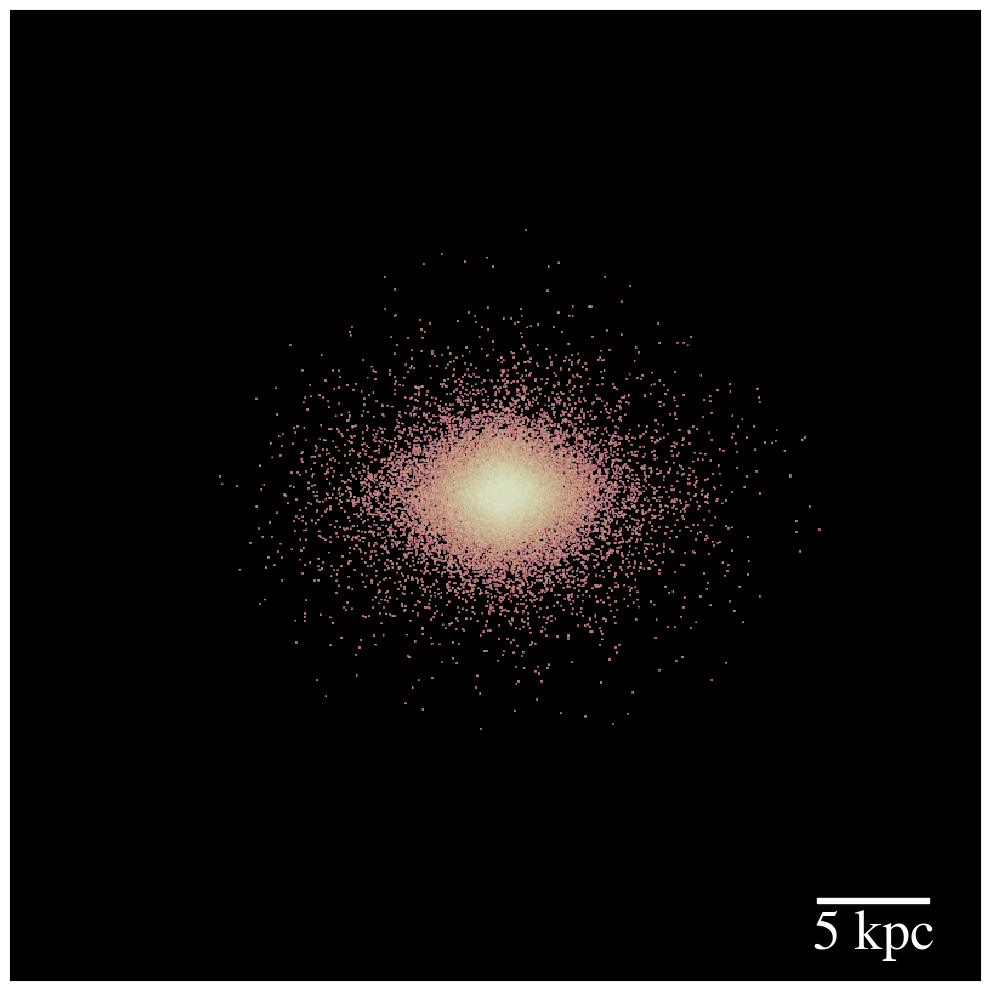

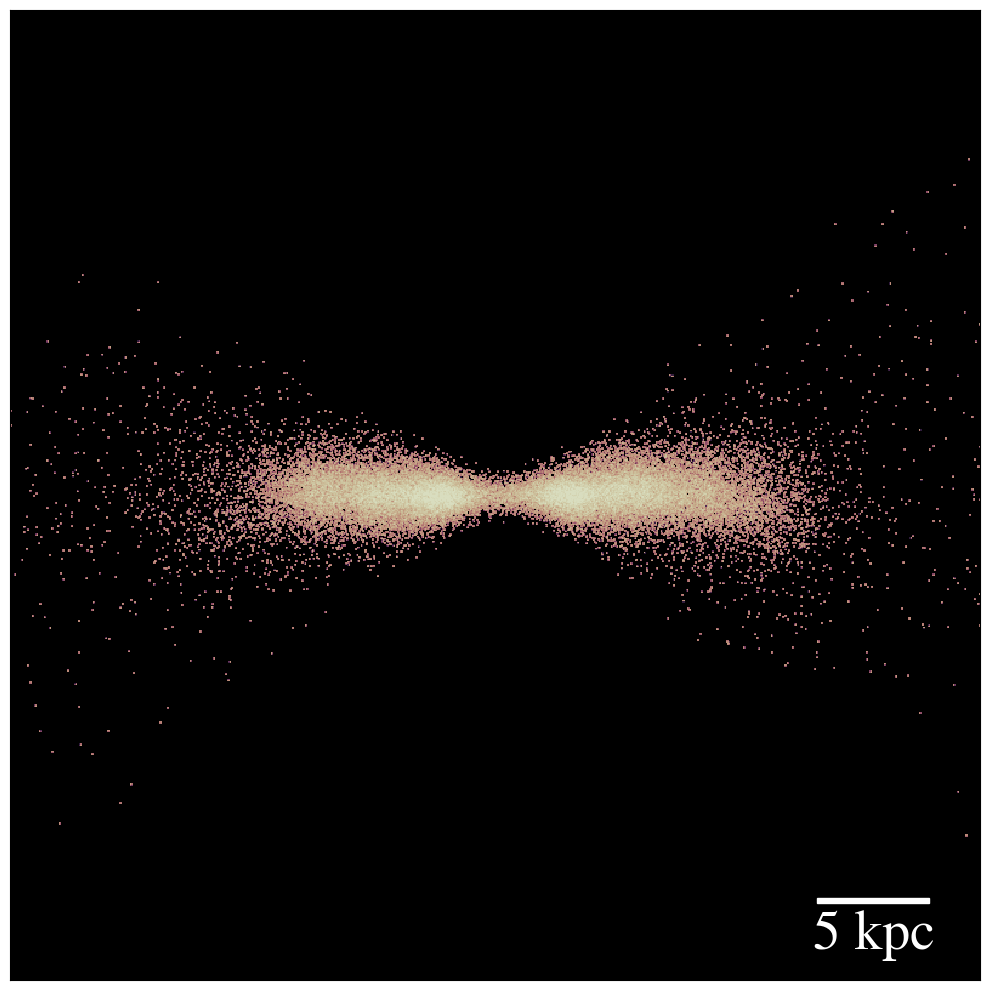

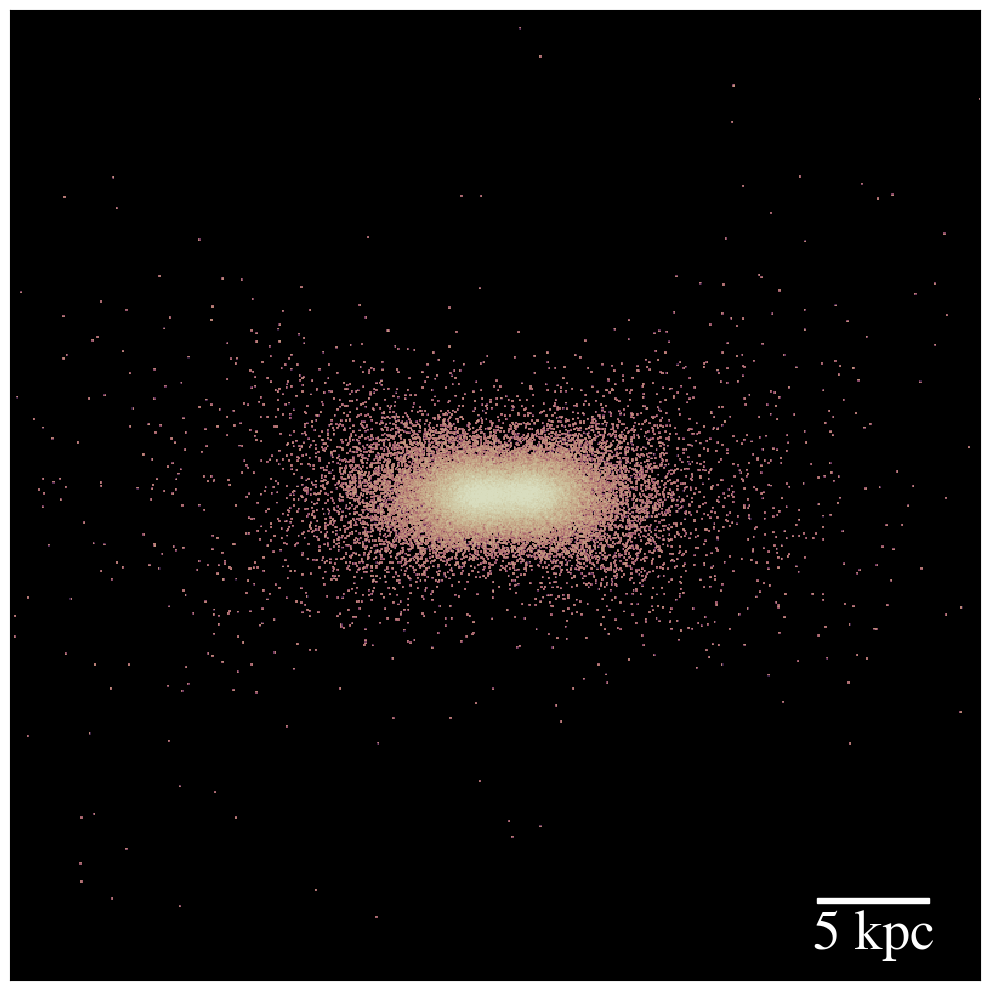

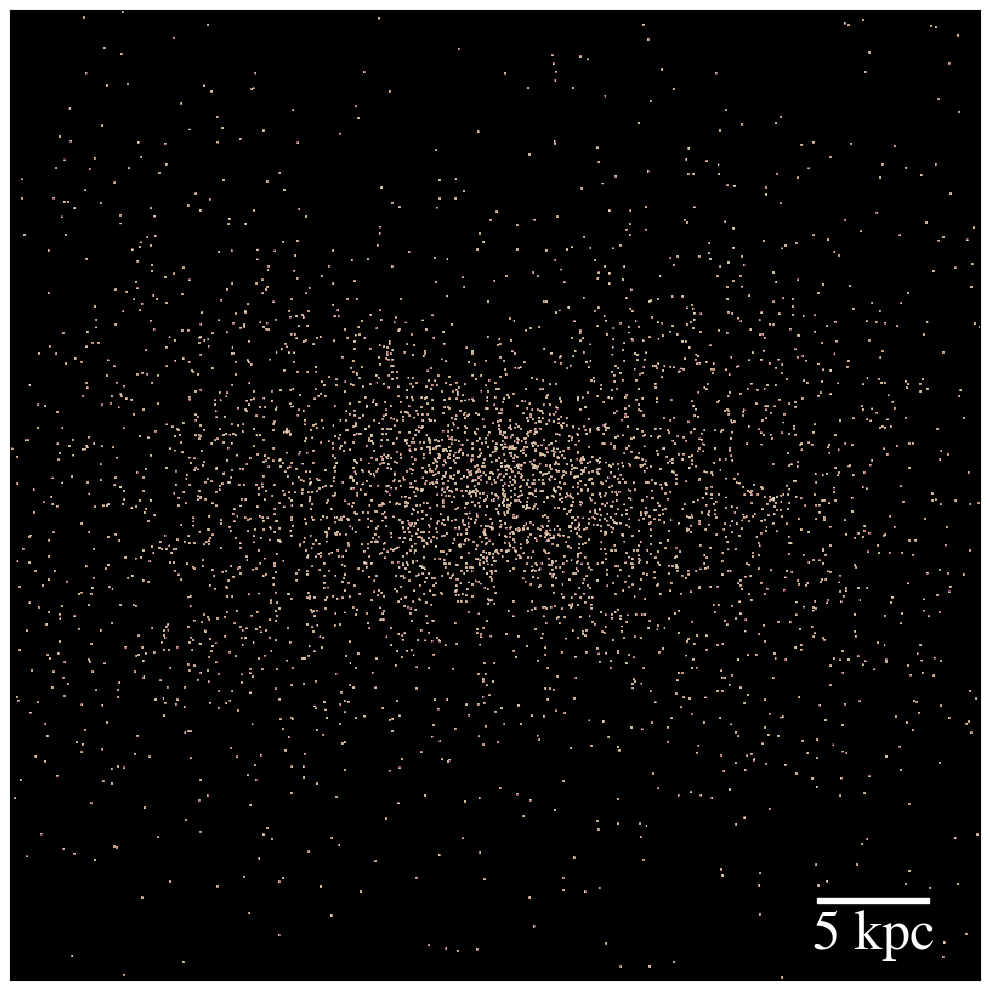

In [9]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    normal="x",
    save=save,
    hide_colorbar=True,
    hide_axes=True,
    figure_subdirectory=figure_subdirectory,
)